In [1]:
import pandas as pd
import requests
from matplotlib import pyplot as plt
import json
from pprint import pprint

In [2]:
outbreak_df = pd.read_csv("Cleaned_outbreak_data.csv")
outbreak_df

,Year,Month,State,Primary Mode,Etiology,Etiology Status,Setting,Illnesses,Hospitalizations,Info on Hospitalizations,Deaths,Info on Deaths
0,2020,1,Wisconsin,Person-to-person,Norovirus Genogroup II,Confirmed,Other healthcare facility,6,0.0,6.0,0.0,6
1,2020,1,Nebraska,Person-to-person,Norovirus Genogroup II,Confirmed,Long-term care/nursing home/assisted living fa...,20,1.0,20.0,0.0,20
2,2020,1,New York,Food,Clostridium perfringens,Suspected,Caterer (food prepared off-site from where ser...,7,0.0,7.0,0.0,7
3,2020,1,New Mexico,Person-to-person,Norovirus Genogroup II,Confirmed,Long-term care/nursing home/assisted living fa...,18,0.0,18.0,0.0,18
4,2020,1,Minnesota,Person-to-person,Norovirus unknown,Suspected,Long-term care/nursing home/assisted living fa...,95,1.0,95.0,2.0,95
...,...,...,...,...,...,...,...,...,...,...,...,...
2604,2021,7,Kansas,Food,Cyclospora cayetanensis,Confirmed,Restaurant - Sit-down dining,9,1.0,8.0,0.0,9
2605,2021,8,Kansas,Food,Salmonella enterica,Confirmed,Restaurant - Sit-down dining,2,0.0,2.0,0.0,2
2606,2021,11,Multistate,Food,Listeria monocytogenes,Confirmed,Unknown,7,7.0,7.0,3.0,7
2607,2021,5,Arizona,Person-to-person,Norovirus Genogroup II,Suspected,Ship/boat,19,0.0,19.0,0.0,19


In [3]:
et_year = outbreak_df.groupby(["Etiology"])

hosp_ets = pd.DataFrame(et_year["Hospitalizations"].sum())
hosp_ets = hosp_ets.sort_values(by=["Hospitalizations"],ascending = False)
hosp_ets = hosp_ets.rename(columns={"Hospitalizations":"Hospitalizations (Total Cases)"})
hosp_ets

,Hospitalizations (Total Cases)
Etiology,
Salmonella enterica,1707.0
Norovirus unknown,355.0
Norovirus Genogroup II,189.0
"Escherichia coli, Shiga toxin-producing",172.0
Legionella pneumophila,168.0
...,...
"Escherichia coli, Enterotoxigenic; Norovirus unknown",0.0
"Escherichia coli, Enteropathogenic; Sapovirus Genogroup I",0.0
"Escherichia coli, Enteropathogenic; Norovirus Genogroup II; Norovirus unknown; Sapovirus unknown; Campylobacter unknown; Astrovirus; Rotavirus",0.0


In [4]:
hosp_ets_top_10 = pd.DataFrame(hosp_ets["Hospitalizations (Total Cases)"].nlargest(10))
hosp_ets_top_10 

,Hospitalizations (Total Cases)
Etiology,
Salmonella enterica,1707.0
Norovirus unknown,355.0
Norovirus Genogroup II,189.0
"Escherichia coli, Shiga toxin-producing",172.0
Legionella pneumophila,168.0
Listeria monocytogenes,105.0
Norovirus,96.0
Norovirus Genogroup II; Norovirus Genogroup II,65.0
Shigella flexneri,49.0


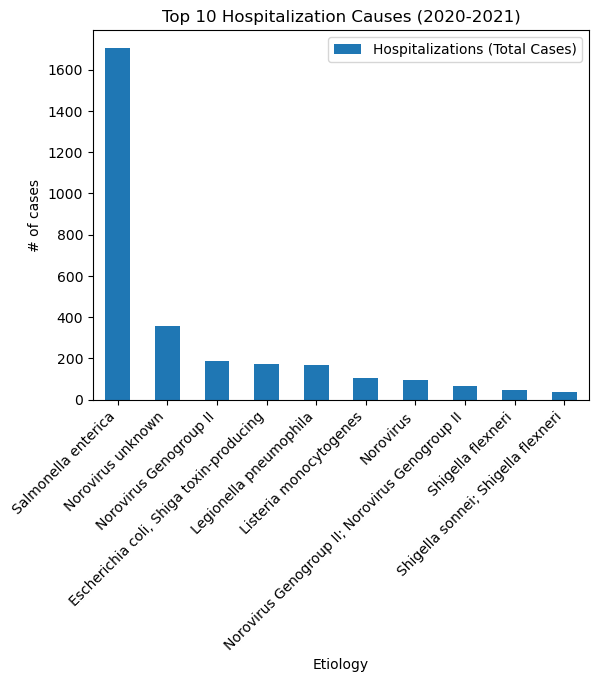

In [5]:
hosp_ets_top_10.plot(  kind="bar", xlabel="Etiology", ylabel = "# of cases", title = "Top 10 Hospitalization Causes (2020-2021)")
plt.xticks(rotation = 45, ha="right")
plt.savefig("top10_hospitalization_causes_perCount_bar.png")
plt.show()

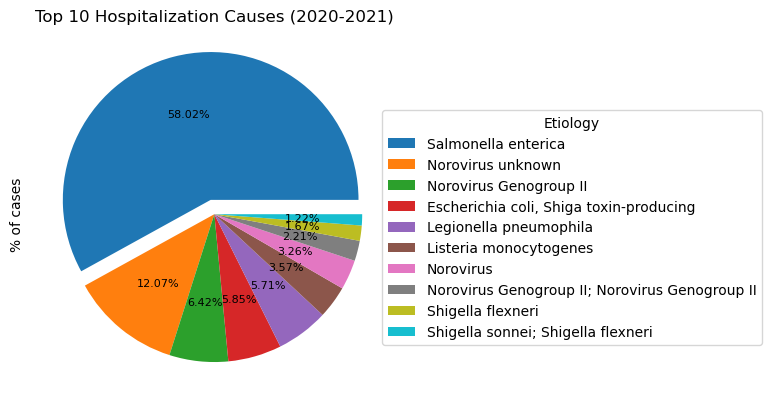

In [6]:

explode = (.1,0,0,0,0,0,0,0,0,0)
hosp_ets_top_10.plot(  kind="pie", y="Hospitalizations (Total Cases)", title = "Top 10 Hospitalization Causes (2020-2021)", 
                         legend = False, autopct = "%.2f%%", labeldistance= None, 
                         fontsize = 8, explode=explode, startangle= 0)
plt.legend(loc="upper right", labels = hosp_ets_top_10.index, bbox_to_anchor=(2,.8),title="Etiology")
plt.ylabel("% of cases")
plt.savefig("top10_hospitalization_causes_perCount_pie.png")
plt.show()

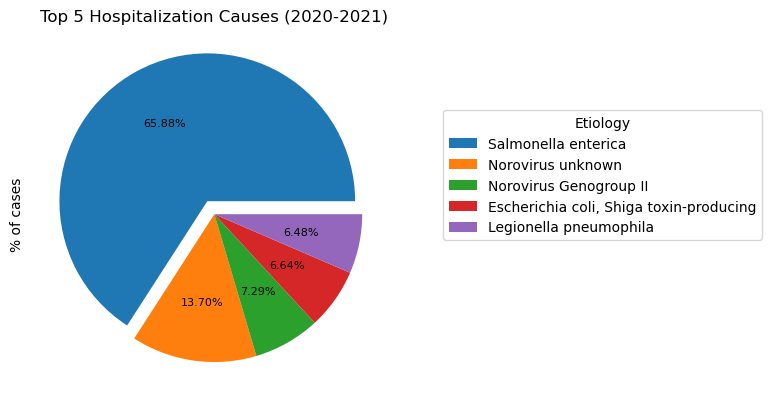

In [7]:
hosp_ets_top_5  = pd.DataFrame(hosp_ets["Hospitalizations (Total Cases)"].nlargest(5))
explode = (.1,0,0,0,0)
hosp_ets_top_5.plot(  kind="pie", y="Hospitalizations (Total Cases)", title = "Top 5 Hospitalization Causes (2020-2021)", 
                         legend = False, autopct = "%.2f%%", labeldistance= None, 
                         fontsize = 8, explode=explode, startangle= 0)
plt.legend(loc="upper right", labels = hosp_ets_top_5.index, bbox_to_anchor=(2,.8),title="Etiology")
plt.ylabel("% of cases")
plt.savefig("top5_hospitalization_causes_perCount_pie")
plt.show()


In [8]:
ill_ets = pd.DataFrame(et_year["Illnesses"].sum())
ill_ets = ill_ets.sort_values(by=["Illnesses"],ascending = False)
ill_ets = ill_ets.rename(columns= {"Illnesses":"Total Reported Cases"})
ill_ets

,Total Reported Cases
Etiology,
Norovirus unknown,17424
Norovirus Genogroup II,11536
Salmonella enterica,8382
Norovirus,7458
Norovirus Genogroup II; Norovirus Genogroup II,1141
...,...
Campylobacter jejuni; Norovirus unknown,2
Shigella,2
Campylobacter unknown; Campylobacter jejuni,2


In [9]:
ill_ets_top10 = pd.DataFrame(ill_ets["Total Reported Cases"].nlargest(10))
ill_ets_top10

,Total Reported Cases
Etiology,
Norovirus unknown,17424
Norovirus Genogroup II,11536
Salmonella enterica,8382
Norovirus,7458
Norovirus Genogroup II; Norovirus Genogroup II,1141
Norovirus Genogroup I,932
"Escherichia coli, Shiga toxin-producing",704
Bacillus cereus,544
Clostridium perfringens,486


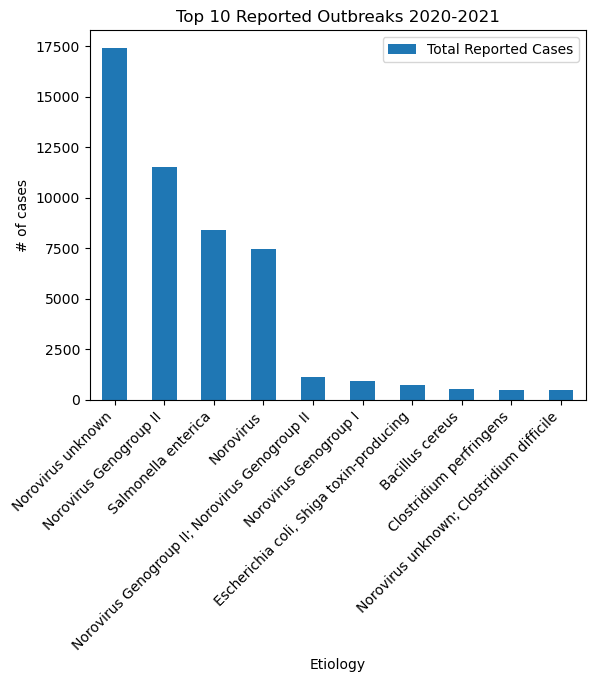

In [10]:
ill_ets_top10.plot(  kind="bar", xlabel="Etiology", ylabel = "# of cases", title = "Top 10 Reported Outbreaks 2020-2021")
plt.xticks(rotation = 45, ha="right")
plt.savefig("top10_reported_outbreaks_perCount_bar.png")
plt.show()

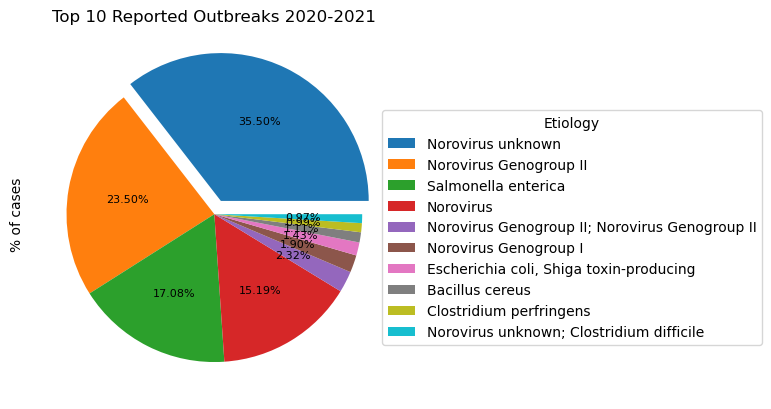

In [11]:
explode = (.1,0,0,0,0,0,0,0,0,0)
ill_ets_top10.plot(  kind="pie", y="Total Reported Cases", title = "Top 10 Reported Outbreaks 2020-2021", 
                         legend = False, autopct = "%.2f%%", labeldistance= None, 
                         fontsize = 8, explode=explode, startangle= 0)
plt.legend(loc="upper right", labels = ill_ets_top10.index, bbox_to_anchor=(2,.8), title="Etiology")
plt.ylabel("% of cases")
plt.savefig("top10_reported_outbreaks_perCount_pie.png")
plt.show()

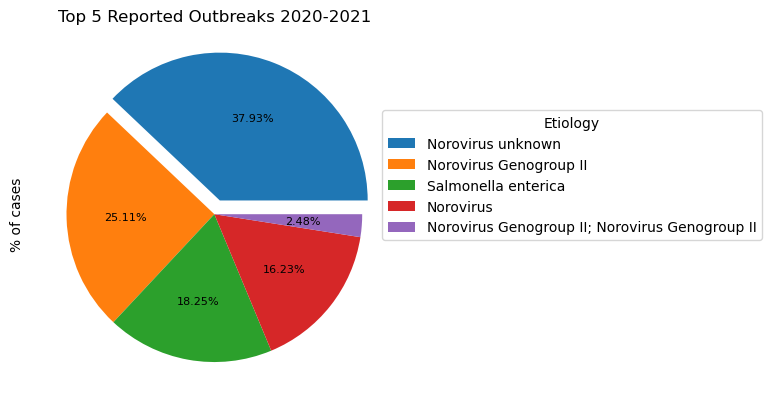

In [12]:
ill_ets_top5 = pd.DataFrame(ill_ets["Total Reported Cases"].nlargest(5))

explode = (.1,0,0,0,0)
ill_ets_top5.plot(  kind="pie", y="Total Reported Cases", title = "Top 5 Reported Outbreaks 2020-2021", 
                         legend = False, autopct = "%.2f%%", labeldistance= None, 
                         fontsize = 8, explode=explode, startangle= 0)
plt.legend(loc="upper right", labels = ill_ets_top5.index, bbox_to_anchor=(2,.8), title="Etiology")
plt.ylabel("% of cases")
plt.savefig("top5_reported_outbreaks_perCount_pie.png")
plt.show()

In [13]:
hosp_perc = pd.merge(hosp_ets,ill_ets, on = "Etiology")
hosp_perc

,Hospitalizations (Total Cases),Total Reported Cases
Etiology,,
Salmonella enterica,1707.0,8382
Norovirus unknown,355.0,17424
Norovirus Genogroup II,189.0,11536
"Escherichia coli, Shiga toxin-producing",172.0,704
Legionella pneumophila,168.0,210
...,...,...
"Escherichia coli, Enterotoxigenic; Norovirus unknown",0.0,11
"Escherichia coli, Enteropathogenic; Sapovirus Genogroup I",0.0,9
"Escherichia coli, Enteropathogenic; Norovirus Genogroup II; Norovirus unknown; Sapovirus unknown; Campylobacter unknown; Astrovirus; Rotavirus",0.0,10


In [14]:

hosp_perc["Hospitalization %"] =  (hosp_perc["Hospitalizations (Total Cases)"]/hosp_perc["Total Reported Cases"])*100
hosp_perc = hosp_perc.sort_values(by=["Hospitalization %"], ascending = False)
hosp_perc

,Hospitalizations (Total Cases),Total Reported Cases,Hospitalization %
Etiology,,,
"Campylobacter coli; Escherichia coli, Enterotoxigenic; Salmonella enterica; Cryptosporidium unknown; Escherichia coli, Enteropathogenic",2.0,2,100.000000
Legionella unknown,15.0,15,100.000000
Legionella pneumophila; Legionella anisa,3.0,3,100.000000
Clostridium botulinum,12.0,12,100.000000
Listeria monocytogenes,105.0,115,91.304348
...,...,...,...
Norovirus; Astrovirus; Sapovirus,0.0,7,0.000000
"Salmonella unknown; Escherichia coli, Enterotoxigenic",0.0,5,0.000000
Salmonella unknown; Salmonella unknown,0.0,3,0.000000


In [15]:
hosp_perc_top20 = pd.DataFrame(hosp_perc["Hospitalization %"].nlargest(20))
hosp_perc_top20 = pd.merge(hosp_perc_top20,hosp_perc, how="left", on="Etiology")
hosp_perc_top20 = hosp_perc_top20.drop(columns ="Hospitalization %_x" ).rename(columns={"Hospitalization %_y":"Hospitalization %"})
hosp_perc_top20

,Hospitalizations (Total Cases),Total Reported Cases,Hospitalization %
Etiology,,,
"Campylobacter coli; Escherichia coli, Enterotoxigenic; Salmonella enterica; Cryptosporidium unknown; Escherichia coli, Enteropathogenic",2.0,2,100.000000
Legionella unknown,15.0,15,100.000000
Legionella pneumophila; Legionella anisa,3.0,3,100.000000
Clostridium botulinum,12.0,12,100.000000
Listeria monocytogenes,105.0,115,91.304348
Brucella other,10.0,11,90.909091
Legionella,5.0,6,83.333333
Legionella pneumophila,168.0,210,80.000000
Vibrio parahaemolyticus; Vibrio parahaemolyticus,6.0,8,75.000000


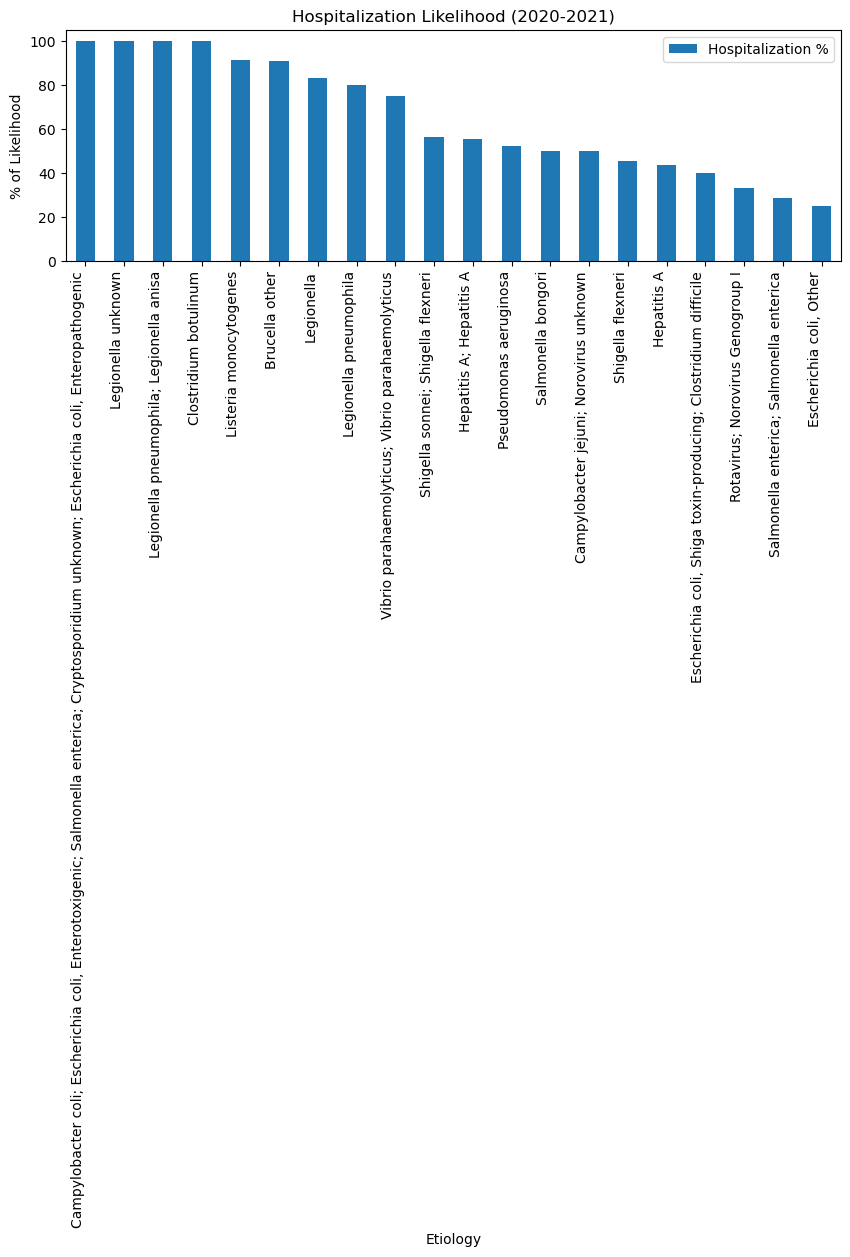

In [16]:
hosp_perc_top20.plot(  kind="bar", y= "Hospitalization %", xlabel="Etiology", ylabel = "% of Likelihood", title = "Hospitalization Likelihood (2020-2021)",
                    figsize = (10,3))
plt.xticks(rotation = 90, ha="right")
plt.savefig("top20_hospitalization_likelihood_bar.png")
plt.show()

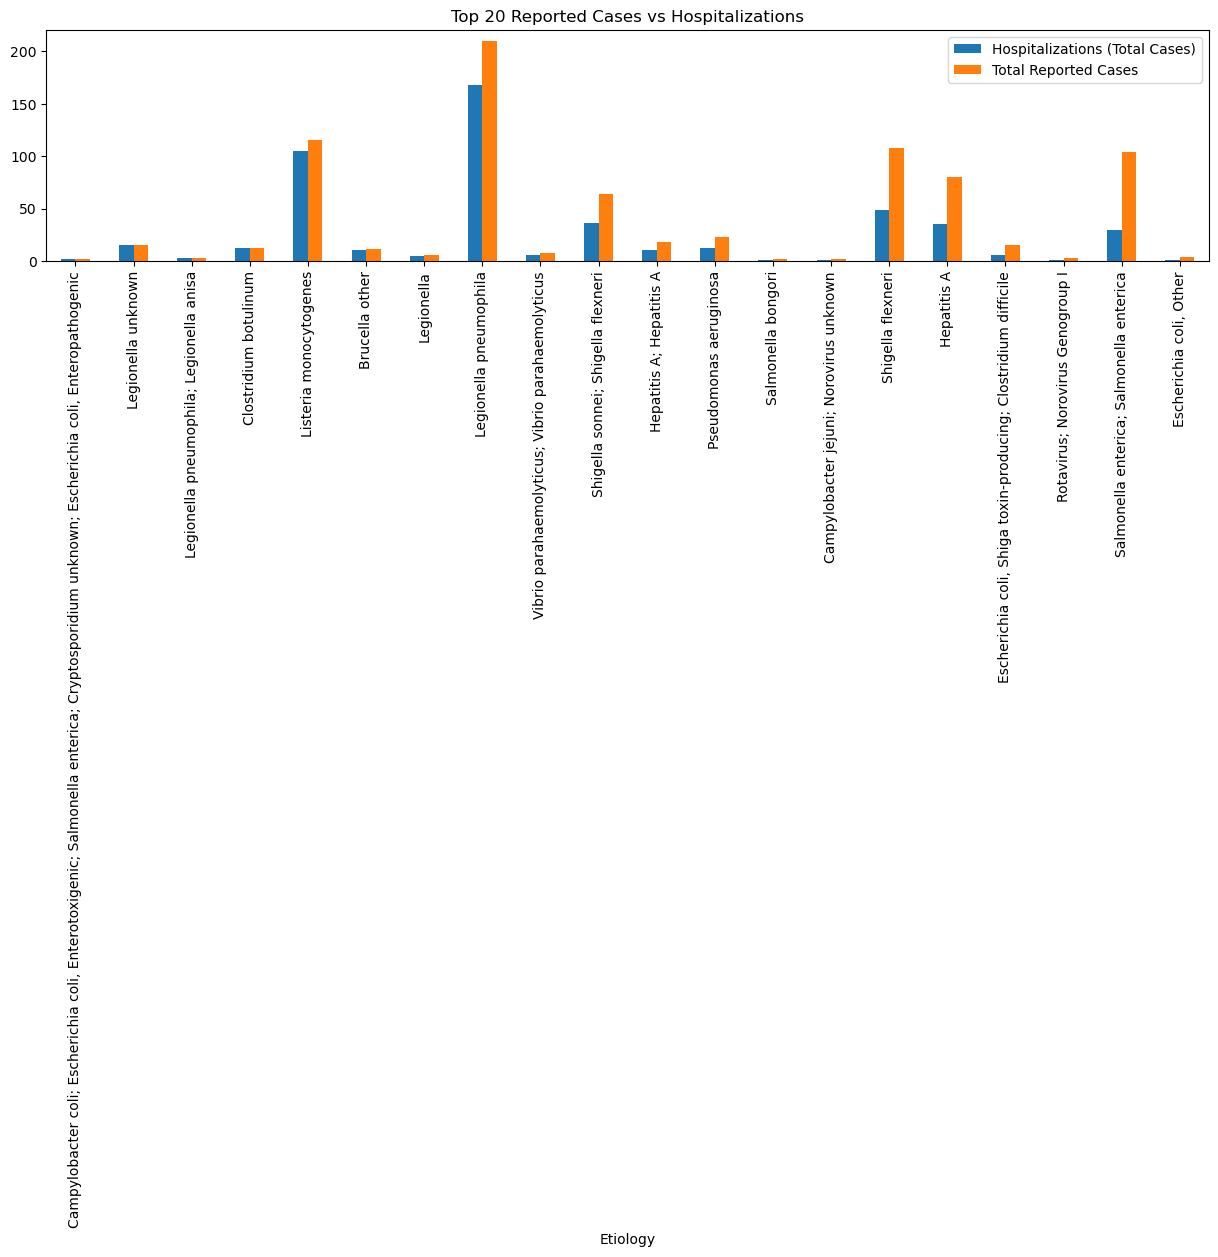

In [17]:
# plt.plot(hosp_perc_top10.index,hosp_perc_top10["Hospitalizations (Total Cases)"], label = "Total Hospitalizations")
# plt.plot(hosp_perc_top10.index,hosp_perc_top10["Total Reported Cases"], label = "Total Reported Cases")
hosp_perc_top20.plot(kind= "bar", y=["Hospitalizations (Total Cases)","Total Reported Cases"],
                    title="Top 20 Reported Cases vs Hospitalizations", figsize = (15,3))
plt.xticks(rotation = 90)
plt.legend()
plt.savefig("top20_hospitalization_likelihood_V_totalcases_bar.png")
plt.show()

In [18]:
hosp_ill_top = ill_ets_top10
hosp_ill_top = pd.merge(hosp_ill_top,hosp_ets, how = "left", on= "Etiology")
hosp_ill_top

,Total Reported Cases,Hospitalizations (Total Cases)
Etiology,,
Norovirus unknown,17424,355.0
Norovirus Genogroup II,11536,189.0
Salmonella enterica,8382,1707.0
Norovirus,7458,96.0
Norovirus Genogroup II; Norovirus Genogroup II,1141,65.0
Norovirus Genogroup I,932,5.0
"Escherichia coli, Shiga toxin-producing",704,172.0
Bacillus cereus,544,0.0
Clostridium perfringens,486,0.0


In [19]:
ill_hosp_top = hosp_ets_top_10
ill_hosp_top = pd.merge(ill_hosp_top,ill_ets, how = "left", on= "Etiology")
ill_hosp_top

,Hospitalizations (Total Cases),Total Reported Cases
Etiology,,
Salmonella enterica,1707.0,8382
Norovirus unknown,355.0,17424
Norovirus Genogroup II,189.0,11536
"Escherichia coli, Shiga toxin-producing",172.0,704
Legionella pneumophila,168.0,210
Listeria monocytogenes,105.0,115
Norovirus,96.0,7458
Norovirus Genogroup II; Norovirus Genogroup II,65.0,1141
Shigella flexneri,49.0,108


In [20]:
top_combined = pd.merge(ill_hosp_top,hosp_ill_top, how = "outer", on = "Etiology")
top_combined["Hospitalizations (Total Cases)"] = top_combined["Hospitalizations (Total Cases)_x"].combine_first(top_combined["Hospitalizations (Total Cases)_y"])
top_combined["Total Reported Cases"] = top_combined["Total Reported Cases_x"].fillna(top_combined["Total Reported Cases_y"])
top_combined = top_combined[["Hospitalizations (Total Cases)","Total Reported Cases"]]
top_combined

,Hospitalizations (Total Cases),Total Reported Cases
Etiology,,
Salmonella enterica,1707.0,8382.0
Norovirus unknown,355.0,17424.0
Norovirus Genogroup II,189.0,11536.0
"Escherichia coli, Shiga toxin-producing",172.0,704.0
Legionella pneumophila,168.0,210.0
Listeria monocytogenes,105.0,115.0
Norovirus,96.0,7458.0
Norovirus Genogroup II; Norovirus Genogroup II,65.0,1141.0
Shigella flexneri,49.0,108.0


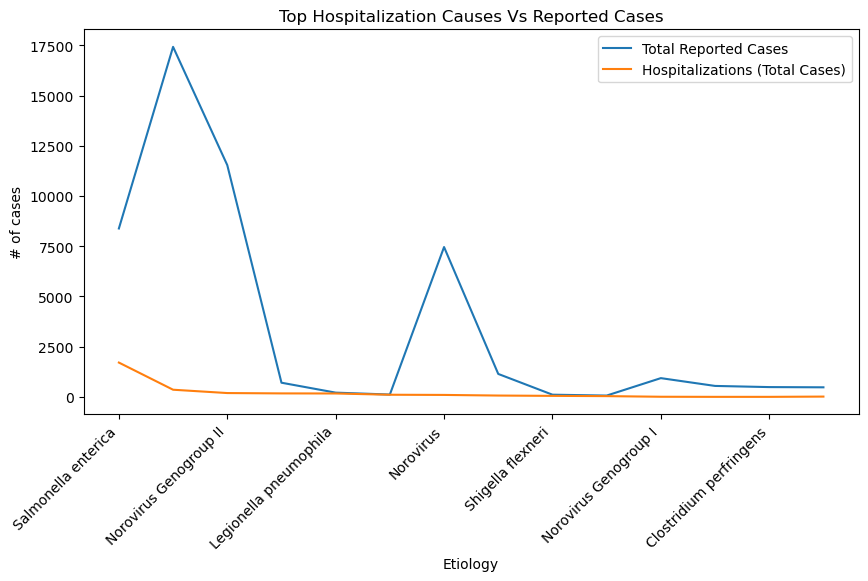

In [21]:
top_combined.plot(kind="line",ylabel= "# of cases",y=["Total Reported Cases","Hospitalizations (Total Cases)"], title= "Top Hospitalization Causes Vs Reported Cases", figsize=(10,5))
plt.xticks(rotation=45, ha= "right")
plt.savefig("top_hospitalization_perCount_with_reported_Cases_line.png")
plt.show()

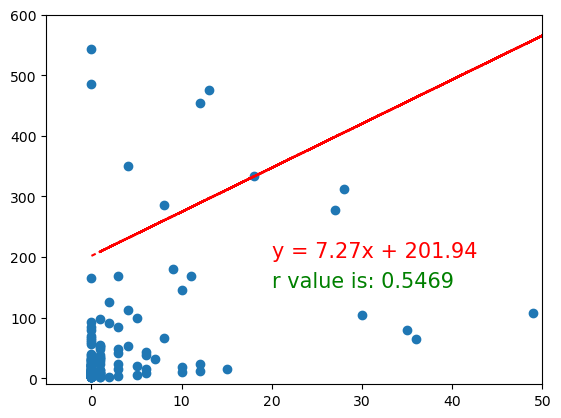

In [22]:
from scipy import stats
plt.scatter(hosp_perc["Hospitalizations (Total Cases)"],hosp_perc["Total Reported Cases"])
plt.ylim(-10,600)
plt.xlim(-5,50)
slope, int, r, p, std_err = stats.linregress(hosp_perc["Hospitalizations (Total Cases)"],hosp_perc["Total Reported Cases"])
lin_reg = (slope * hosp_perc["Hospitalizations (Total Cases)"]) + int
plt.plot(hosp_perc["Hospitalizations (Total Cases)"],lin_reg, "--", color = "red")

#create string of lin reg and show on plot
lin_eq = f"y = {round(slope,2)}x + {round(int,2)}"
plt.annotate(lin_eq,(20,200),fontsize=15, color = "red")
plt.annotate(f"r value is: {round(r,4)}",(20,150),fontsize=15, color = "green")

plt.show()

In [23]:
death_ets = pd.DataFrame(et_year["Deaths"].sum())
death_ets = death_ets.sort_values(by=["Deaths"],ascending = False)
death_ets = death_ets.rename(columns={"Deaths":"Deaths (Total Cases)"})
death_ets

,Deaths (Total Cases)
Etiology,
Norovirus unknown,22.0
Norovirus Genogroup II,19.0
Listeria monocytogenes,18.0
Legionella pneumophila,14.0
Salmonella enterica,11.0
...,...
"Escherichia coli, Enteroinvasive; Escherichia coli, Enteroinvasive",0.0
"Escherichia coli, Enteropathogenic",0.0
"Escherichia coli, Enteropathogenic; Norovirus Genogroup II; Norovirus unknown; Sapovirus unknown; Campylobacter unknown; Astrovirus; Rotavirus",0.0


In [24]:
death_ets_ill = pd.merge(death_ets,ill_ets, how ="left", on="Etiology")
death_ets_ill

,Deaths (Total Cases),Total Reported Cases
Etiology,,
Norovirus unknown,22.0,17424
Norovirus Genogroup II,19.0,11536
Listeria monocytogenes,18.0,115
Legionella pneumophila,14.0,210
Salmonella enterica,11.0,8382
...,...,...
"Escherichia coli, Enteroinvasive; Escherichia coli, Enteroinvasive",0.0,16
"Escherichia coli, Enteropathogenic",0.0,66
"Escherichia coli, Enteropathogenic; Norovirus Genogroup II; Norovirus unknown; Sapovirus unknown; Campylobacter unknown; Astrovirus; Rotavirus",0.0,10


In [25]:
total_deaths = outbreak_df["Deaths"].sum()

death_ets_top10 = pd.DataFrame(death_ets_ill["Deaths (Total Cases)"].nlargest(10))
death_ets_top10["Death % of All Deaths"] = round((death_ets_top10["Deaths (Total Cases)"]/total_deaths)*100,2)
death_ets_top10 = pd.merge(death_ets_top10,death_ets_ill, how= "left", on = ["Etiology","Deaths (Total Cases)"])
death_ets_top10["Death % of All Reported Cases"] = round((death_ets_top10["Deaths (Total Cases)"]/death_ets_top10["Total Reported Cases"])*100,2)
death_ets_top10

,Deaths (Total Cases),Death % of All Deaths,Total Reported Cases,Death % of All Reported Cases
Etiology,,,,
Norovirus unknown,22.0,19.30,17424,0.13
Norovirus Genogroup II,19.0,16.67,11536,0.16
Listeria monocytogenes,18.0,15.79,115,15.65
Legionella pneumophila,14.0,12.28,210,6.67
Salmonella enterica,11.0,9.65,8382,0.13
Pseudomonas aeruginosa,4.0,3.51,23,17.39
Hepatitis A,4.0,3.51,80,5.00
Norovirus unknown; Clostridium difficile,4.0,3.51,475,0.84
"Escherichia coli, Shiga toxin-producing",3.0,2.63,704,0.43


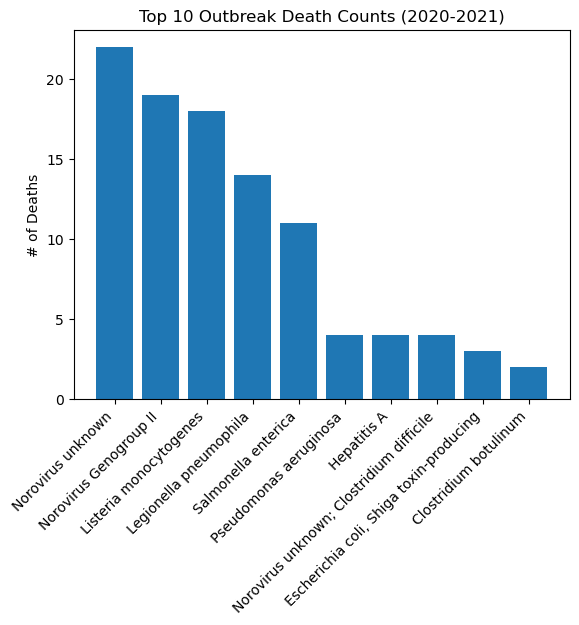

In [26]:
plt.bar(death_ets_top10.index,death_ets_top10["Deaths (Total Cases)"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Outbreak Death Counts (2020-2021)")
plt.savefig("top10_death_causes_perCount_bar.png")
plt.ylabel("# of Deaths")
plt.show()

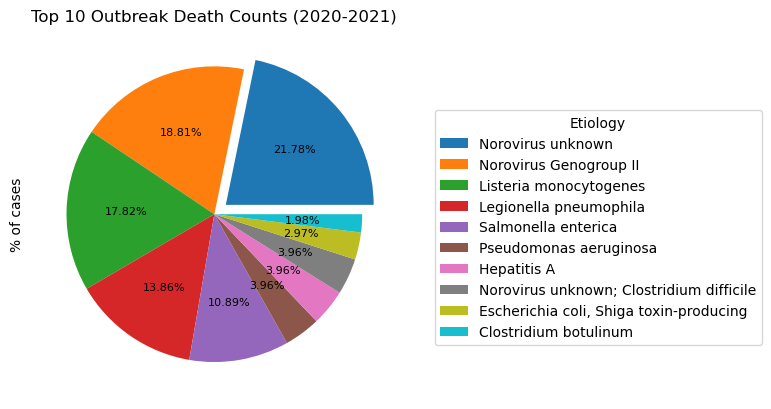

In [27]:
explode = (.1,0,0,0,0,0,0,0,0,0)
death_ets_top10.plot(  kind="pie", y="Deaths (Total Cases)", title = "Top 10 Outbreak Death Counts (2020-2021)", 
                         legend = False, autopct = "%.2f%%", labeldistance= None, 
                         fontsize = 8, explode=explode, startangle= 0)
plt.legend(loc="upper right", labels = death_ets_top10.index, bbox_to_anchor=(2,.8), title="Etiology")
plt.ylabel("% of cases")
plt.savefig("top10_deaths_perCount_pie.png")
plt.show()

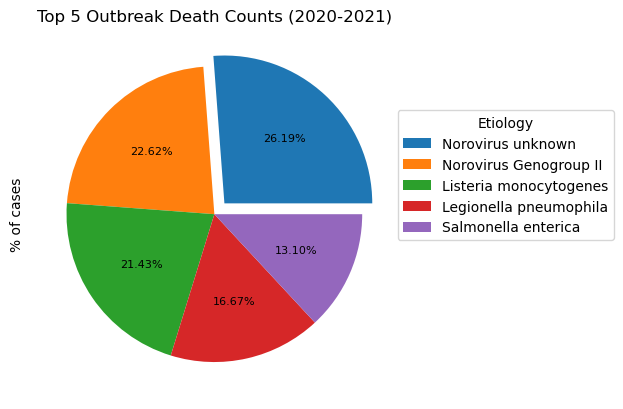

In [28]:
death_ets_top5 = pd.DataFrame(death_ets_ill["Deaths (Total Cases)"].nlargest(5))

explode = (.1,0,0,0,0)
death_ets_top5.plot(  kind="pie", y="Deaths (Total Cases)", title = "Top 5 Outbreak Death Counts (2020-2021)", 
                         legend = False, autopct = "%.2f%%", labeldistance= None, 
                         fontsize = 8, explode=explode, startangle= 0)
plt.legend(loc="upper right", labels = death_ets_top5.index, bbox_to_anchor=(1.6,.8), title="Etiology")
plt.ylabel("% of cases")
plt.savefig("top5_deaths_perCount_pie.png")
plt.show()

In [29]:
death_ets_top10_raw = pd.DataFrame(death_ets_ill["Deaths (Total Cases)"].nlargest(10))

top_combined = pd.merge(top_combined,death_ets_ill,how="left", on = ["Etiology","Total Reported Cases"])
top_combined = top_combined[["Total Reported Cases", "Hospitalizations (Total Cases)", "Deaths (Total Cases)"]]
top_combined["% Hospitalization to Total Cases"] = round((top_combined["Hospitalizations (Total Cases)"]/top_combined["Total Reported Cases"])*100,2)
top_combined["% Death to Total Cases"] = round((top_combined["Deaths (Total Cases)"]/top_combined["Total Reported Cases"])*100,2)
top_combined["% Death to Hospitalization"] = round((top_combined["Deaths (Total Cases)"]/top_combined["Hospitalizations (Total Cases)"])*100,2)
top_combined

,Total Reported Cases,Hospitalizations (Total Cases),Deaths (Total Cases),% Hospitalization to Total Cases,% Death to Total Cases,% Death to Hospitalization
Etiology,,,,,,
Salmonella enterica,8382.0,1707.0,11.0,20.37,0.13,0.64
Norovirus unknown,17424.0,355.0,22.0,2.04,0.13,6.20
Norovirus Genogroup II,11536.0,189.0,19.0,1.64,0.16,10.05
"Escherichia coli, Shiga toxin-producing",704.0,172.0,3.0,24.43,0.43,1.74
Legionella pneumophila,210.0,168.0,14.0,80.00,6.67,8.33
Listeria monocytogenes,115.0,105.0,18.0,91.30,15.65,17.14
Norovirus,7458.0,96.0,1.0,1.29,0.01,1.04
Norovirus Genogroup II; Norovirus Genogroup II,1141.0,65.0,0.0,5.70,0.00,0.00
Shigella flexneri,108.0,49.0,0.0,45.37,0.00,0.00


In [30]:
death_ets_perc = pd.DataFrame(et_year["Deaths"].sum())
death_ets_perc = pd.merge(death_ets_perc,ill_ets, how = "left", on =  "Etiology").rename(columns={"Deaths": "Deaths (Total Cases)"})
death_ets_perc["% Death to Total Cases"] = round((death_ets_perc["Deaths (Total Cases)"]/death_ets_perc["Total Reported Cases"])*100,2)
death_ets_perc = death_ets_perc.sort_values(by="% Death to Total Cases", ascending = False)
death_ets_perc

,Deaths (Total Cases),Total Reported Cases,% Death to Total Cases
Etiology,,,
Legionella pneumophila; Legionella anisa,1.0,3,33.33
Pseudomonas aeruginosa,4.0,23,17.39
Clostridium botulinum,2.0,12,16.67
Listeria monocytogenes,18.0,115,15.65
Legionella unknown,2.0,15,13.33
...,...,...,...
"Escherichia coli, Enteroinvasive; Escherichia coli, Enteroinvasive",0.0,16,0.00
"Escherichia coli, Enteropathogenic",0.0,66,0.00
"Escherichia coli, Enteropathogenic; Norovirus Genogroup II; Norovirus unknown; Sapovirus unknown; Campylobacter unknown; Astrovirus; Rotavirus",0.0,10,0.00


In [31]:
death_ets_perc_top10 = death_ets_perc.head(10)
death_ets_perc_top10

,Deaths (Total Cases),Total Reported Cases,% Death to Total Cases
Etiology,,,
Legionella pneumophila; Legionella anisa,1.0,3,33.33
Pseudomonas aeruginosa,4.0,23,17.39
Clostridium botulinum,2.0,12,16.67
Listeria monocytogenes,18.0,115,15.65
Legionella unknown,2.0,15,13.33
Legionella pneumophila,14.0,210,6.67
Rotavirus,2.0,33,6.06
Hepatitis A,4.0,80,5.00
Clostridium,1.0,44,2.27


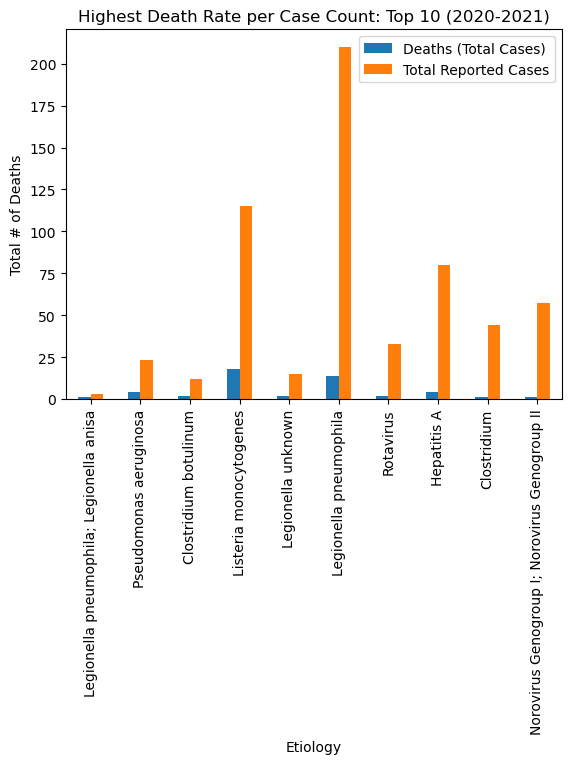

In [32]:
death_ets_perc_top10.plot(kind="bar", y=["Deaths (Total Cases)", "Total Reported Cases"], xlabel = "Etiology",
                         ylabel = "Total # of Deaths", title = "Highest Death Rate per Case Count: Top 10 (2020-2021)")
plt.savefig("top10_death_rate_perCasecount_bar.png")
plt.show()

In [33]:
death_hosp_ets_top10 = pd.merge(death_ets_perc_top10,hosp_ets, how= "left", on ="Etiology")
death_hosp_ets_top10 = death_hosp_ets_top10[["Total Reported Cases","Hospitalizations (Total Cases)","Deaths (Total Cases)","% Death to Total Cases"]]
death_hosp_ets_top10

,Total Reported Cases,Hospitalizations (Total Cases),Deaths (Total Cases),% Death to Total Cases
Etiology,,,,
Legionella pneumophila; Legionella anisa,3,3.0,1.0,33.33
Pseudomonas aeruginosa,23,12.0,4.0,17.39
Clostridium botulinum,12,12.0,2.0,16.67
Listeria monocytogenes,115,105.0,18.0,15.65
Legionella unknown,15,15.0,2.0,13.33
Legionella pneumophila,210,168.0,14.0,6.67
Rotavirus,33,1.0,2.0,6.06
Hepatitis A,80,35.0,4.0,5.00
Clostridium,44,6.0,1.0,2.27


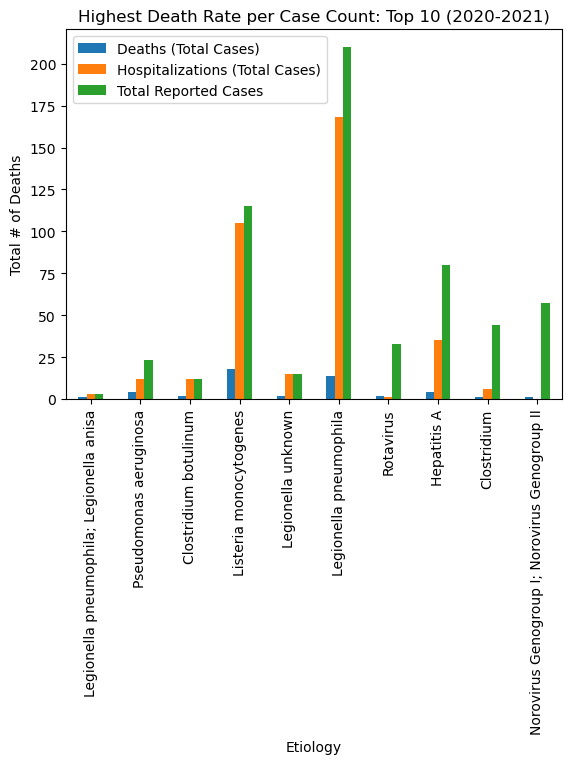

In [34]:
death_hosp_ets_top10.plot(kind="bar", y=["Deaths (Total Cases)","Hospitalizations (Total Cases)", "Total Reported Cases"], xlabel = "Etiology",
                         ylabel = "Total # of Deaths", title = "Highest Death Rate per Case Count: Top 10 (2020-2021)")
plt.savefig("top10_death_rate_perCasecount_bar_with_hospitalizationCounts.png")
plt.show()